In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the 3 public data files from HyMARC's Data Hub and load them into dataframes. Also load the Readme CSV.

chemicals = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/bbe2aafd-287a-485a-8776-6ebb239f72f9/download/hydstormatdb-chemicals.csv')
adsorbants = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/2d5233b8-5862-493e-9183-166bfe963ffe/download/hydstormatdb-adsorbents.csv')
reversible_hydrides = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/4ef1c494-366e-43a3-bed4-a3985de5c374/download/hydstormatdb-reversible_hydrides.csv')
readme = pd.read_csv('https://datahub.hymarc.org/dataset/ad580d95-e7e2-4ef4-a7f6-3b2f91a96eba/resource/f42f5b95-2e63-4cfc-b091-b41e6d1ab851/download/readme.csv')



In [3]:
# Look at the information in the Readme CSV, which lists each column in all three data files, 
#whether it appears in every file or not, and which files it does appear in. This is helpful to seeing what
#can be plotted.

readme.head(35)

,column_name,column_description,common_to_all_files,material_type_chemicals,material_type_adsorbents,material_type_reversible_hydrides
0,material_type,Material Type,yes,yes,yes,yes
1,material_name,Material Name,yes,yes,yes,yes
2,chemical_formula,Chemical Formula,yes,yes,yes,yes
3,keywords,Keywords,yes,yes,yes,yes
4,dopant,Dopant,no,no,yes,no
5,dopant_concentration,Dopant Concentration,no,no,yes,no
6,synthesis_method,Synthesis Method,yes,yes,yes,yes
7,synthesis_conditions,Synthesis Conditions,yes,yes,yes,yes
8,precursors,Precursors,yes,yes,yes,yes
9,activation,Activation,yes,yes,yes,yes


In [5]:
# Examine the reversible_hydrides dataset, see if any of the chemical formula's have multiple entries,
#By performing a groupby and count:

reversible_hydrides.groupby('chemical_formula')['chemical_formula'].count()

chemical_formula
2C3H9N-AlH3                1
2C7H13N-AlH3               1
2LiBH4 + MgF2              1
2LiBH4 + MgH2              1
2LiBH4 + MgS               1
4LiBH4 + 5Mg2NiH4          1
Al(BH4)3 + B10H14          1
AlB4H11                    1
AlB6H13                    1
C4H11N-AlH3                1
C6H12N2-AlH3               1
C6H12N4-AlH3               1
Ca(AlH4)2                  1
K2LiAlH6                   1
K2NaAlH6                   1
Li2B12H12·7NH3             1
LiAlH4-THF                 1
LiBH4@C                    1
Mg(AlH4) (BH4)             1
Mg(CH3OH)6B12H12×6CH3OH    1
Mg(H2O)6B10H10.4H2O        1
Mg(H2O)6B12H12·6H2O        1
Mg(NH3)xB12H12             1
NH4B3H8                    2
Na2LiAlH6                  1
NaB3H8                     1
a-AlH3                     1
b-AlH3                     1
g-AlH3                     1
Name: chemical_formula, dtype: int64

In [6]:
#Do the same groupby and count for adorbants to see if any chemical formulas have multiple entries:

adsorbants.groupby('chemical_formula')['chemical_formula'].count()

chemical_formula
(C81 H45 Cu9 O45)                                  1
C                                                 20
C + B                                              1
C + BCx coating                                    1
C + Co                                             1
C + F                                              1
C + Li/THF                                         1
C + Ni                                             2
C + Pt                                             2
C + Ru                                             2
C+Li/BC6                                           1
C, H, Ni                                           1
C, H, O, Zn                                        1
C, H, Pt                                           1
C, Pt, H                                           1
C,H,Pt                                             1
C/H/Pt                                             1
C10 H5 Cu O5                                       1
C12 H6 Cu O5                 

In [7]:
#View the first ten entries of the chemicals dataframe:
chemicals.head(10)

,material_type,material_name,chemical_formula,keywords,synthesis_method,synthesis_conditions,precursors,activation,principal_investigator,entry_date,...,h_weight_density_theory,h_weight_density_experiment,h_weight_density_reference,h_volume_density_theory,h_volume_density_experiment,h_volume_density_reference,temperature_onset_release,impurities_released,temperature_full_release,temperature_release_reference
0,chemical,"1,3-diaza-2,4- diborabutane",NH3BH2NH2BH3,Other (OT2),NH2B2H5 + NH3(g),"room temperature, NH3 bubbling",NH2B2H5,NaN,J. C. Zhao,4/1/11,...,16.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chemical,"1,3-dimethyl-2-phenylbenz- imidazoline/ HoAc/Pd",C15H16N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,0.85,0.85,"Daniel E. Schwarz et al, Chem. Commun., 2005, ...",NaN,NaN,NaN,298.0,NaN,298.0,"Daniel E. Schwarz et al, Chem. Commun., 2005, ..."
2,chemical,"1,3-dimethyl-2-phenylbenz- imidazoline/ HoAc/Pd",C15H16N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,0.85,0.85,"Daniel E. Schwarz et al, Chem. Commun., 2005, ...",NaN,NaN,NaN,298.0,NaN,298.0,"Daniel E. Schwarz et al, Chem. Commun., 2005, ..."
3,chemical,"1,3-dimethylbenz- imidazoline/HoAc/Pd",C9H12N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,1.30,1.30,"Daniel E. Schwarz et al, Chem. Commun., 2005, ...",NaN,NaN,NaN,298.0,NaN,298.0,"Daniel E. Schwarz et al, Chem. Commun., 2005, ..."
4,chemical,Allylaminoborane,CH2CHCH2NH2BH3,Homogeneous Catalyst,NaN,Conventional organometallic synthesis methods,NaN,NaN,Kevin Ott,11/21/11,...,5.60,4.50,NaN,NaN,NaN,NaN,NaN,NaN,473.0,NaN
5,chemical,Aluminum Tris(amidotrihydroborate),Al(NH2BH3)3,Other (OT2),NaN,Conventional organometallic synthesis methods,LiNH2BH3/AlCl3 in solution,NaN,Kevin Ott,11/21/11,...,10.30,6.70,NaN,NaN,NaN,NaN,333.0,NaN,463.0,NaN
6,chemical,Aluminum tris(amidotrihydroborate) in Ionic Li...,Al(NH2BH3)3+ionic liquid,Other (OT2),NaN,Conventional organometallic synthesis methods,LiNH2BH3/AlCl3 in solution,NaN,Kevin Ott,11/21/11,...,10.30,5.10,NaN,NaN,NaN,NaN,333.0,NaN,413.0,NaN
7,chemical,aminodiborane,NH2B2H5,Other (OT2),NH3BH3 + THFBH3,"under nitrogen, room temperature.",NH3BH3,NaN,J. C. Zhao,4/1/11,...,16.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,chemical,Ammonia Borane,NH3BH3,Other (OT2),"Heldebrant, D.J., et al., Energy & Environment...",NaN,NaN,NaN,Abhi Karkamkar,3/29/11,...,19.40,16.00,NaN,146.0,120.0,NaN,403.0,"Borazine 4-6 wt%, NH3 100-200 ppm",NaN,NaN
9,chemical,Ammonia Borane,NH3BH3,Homogeneous Catalyst,NaN,Conventional organometallic synthesis methods,NaN,NaN,Kevin Ott,11/21/11,...,19.40,6.50,"B. L. Dietrich et al, J. Am. Chem. Soc. 2008, ...",NaN,NaN,NaN,300.0,"Low temperature release, none detected",298.0,"B. L. Dietrich et al, J. Am. Chem. Soc. 2008, ..."


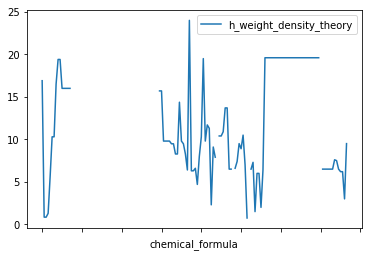

In [8]:
# Plot chemical formula vs h_weight_density_theory from the chemicals dataframe:
chemicals.plot(x='chemical_formula',y='h_weight_density_theory')

In [10]:
#Do a groupby and count on the chemicals dataframe to see if any chemical formulas have multiple entries:
chemicals.groupby('chemical_formula')['chemical_formula'].count()

chemical_formula
(BH2(NH3)2)BH4/bmimCl(50wt%)            1
(C2N2H6)n                               1
(CH3)2CHCH2NH2BH3                       1
(CH3CH2)2NHBH3                          1
(NH3)B3H7/H2O/Rh                        1
(NH4)2B10H10                            1
(NH4)2B10H10/H2O/Rh                     1
(NH4)2B12H12                            1
(NH4)2B12H12/H2O/Rh                     1
(NH4)B11H14/H2O/Rh                      1
2(NH3BH3) + CaH2                        1
2(NH3BH3) + MgH2 + 0.1TiH2 + 0.1CaH2    1
5, 10, 20wt% additive                   2
6(NH3BH3) + 3CaH2 + MgH2 + 0.1TiH2      1
AB + 5% NH4Cl                           1
Al(NH2BH3)3                             1
Al(NH2BH3)3+ionic liquid                1
C15H16N2                                2
C4H12BN                                 1
C9H12N2                                 1
C9N2H14                                 1
CH2CHCH2NH2BH3                          1
CH3NH2-BH3                              1
CH3NH2-BH3-NH3BH3

In [11]:
# Merge all three data frames into one:

chem_ads=chemicals.merge(adsorbants,how='outer')
allmaterials = chem_ads.merge(reversible_hydrides,how='outer')
allmaterials.shape

(267, 31)

In [12]:
# View the first few entries from the merged dataframe:

allmaterials.head()

,material_type,material_name,chemical_formula,keywords,synthesis_method,synthesis_conditions,precursors,activation,principal_investigator,entry_date,...,dopant,dopant_concentration,excess_h_weight_experiment_percent,excess_h_weight_temperature,excess_h_weight_pressure,excess_h_volume_density_experiment,total_h_weight_experiment,total_h_weight_temperature,total_h_weight_pressure,reversible_capacity
0,chemical,"1,3-diaza-2,4- diborabutane",NH3BH2NH2BH3,Other (OT2),NH2B2H5 + NH3(g),"room temperature, NH3 bubbling",NH2B2H5,NaN,J. C. Zhao,4/1/11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chemical,"1,3-dimethyl-2-phenylbenz- imidazoline/ HoAc/Pd",C15H16N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chemical,"1,3-dimethyl-2-phenylbenz- imidazoline/ HoAc/Pd",C15H16N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chemical,"1,3-dimethylbenz- imidazoline/HoAc/Pd",C9H12N2,Heterogeneous Catalyst,Literature,Conventional organic synthesis methods,NaN,NaN,Kevin Ott,11/18/11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chemical,Allylaminoborane,CH2CHCH2NH2BH3,Homogeneous Catalyst,NaN,Conventional organometallic synthesis methods,NaN,NaN,Kevin Ott,11/21/11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


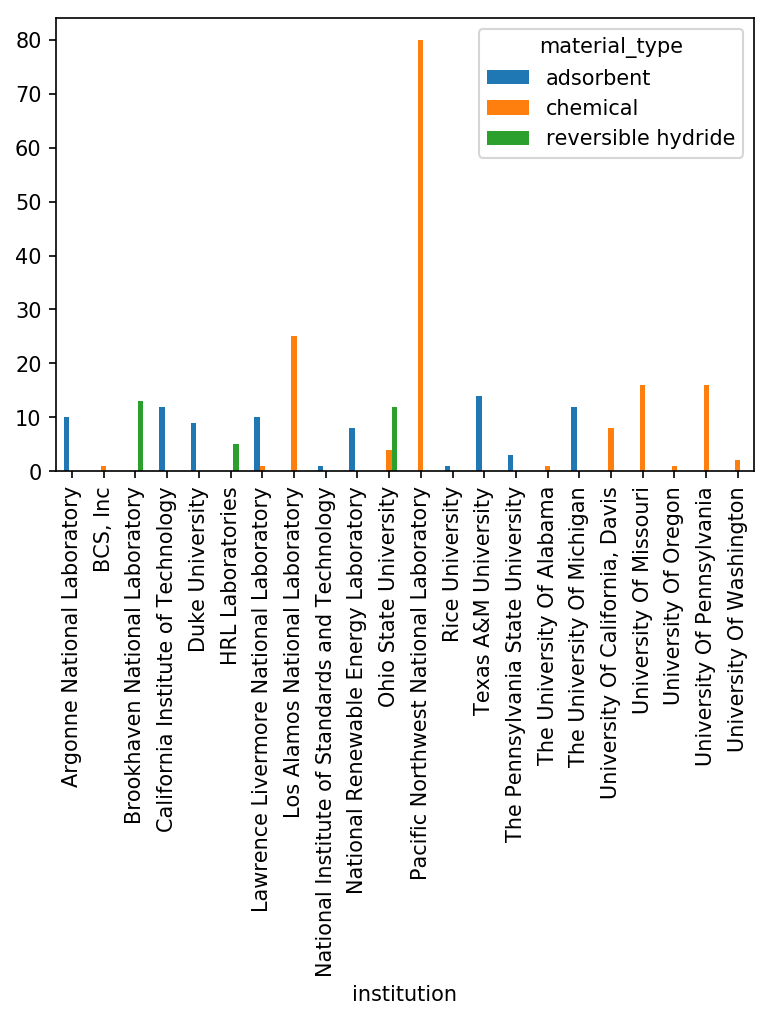

In [13]:
# What institutions submitted entries, by material type?
grpinst=allmaterials.groupby(['institution','material_type']).size().unstack()
plt.rcParams['figure.dpi'] = 150
grpinst.plot.bar()

In [14]:
grpinst.columns

Index(['adsorbent', 'chemical', 'reversible hydride'], dtype='object', name='material_type')

In [59]:
# The chemicals and reversible hydrides both contain the columns h_weight_density_theory and h_weight_density_experiment.
# Create a new dataframe called hweight, that contains just those columns for each material_type and chemical_formula
# and where those values are not empty.

hweight=allmaterials.filter(items=['material_type','chemical_formula','h_weight_density_theory','h_weight_density_experiment'])
hweight=hweight[hweight.h_weight_density_theory.notnull()]
hweight=hweight[hweight.h_weight_density_experiment.notnull()]
hweight

,material_type,chemical_formula,h_weight_density_theory,h_weight_density_experiment
1,chemical,C15H16N2,0.85,0.85
2,chemical,C15H16N2,0.85,0.85
3,chemical,C9H12N2,1.30,1.30
4,chemical,CH2CHCH2NH2BH3,5.60,4.50
5,chemical,Al(NH2BH3)3,10.30,6.70
6,chemical,Al(NH2BH3)3+ionic liquid,10.30,5.10
8,chemical,NH3BH3,19.40,16.00
9,chemical,NH3BH3,19.40,6.50
10,chemical,NH3BH3/Fe catalyst,16.00,13.00
11,chemical,NH3BH3/Pd catalyst,16.00,3.00


In [60]:
# Create another dataframe that contains columns only seen for adsorbents, and name it hweight_ads:

hweight_ads = allmaterials.filter(items=['material_type','chemical_formula','excess_h_weight_experiment_percent','total_h_weight_experiment'])
hweight_ads=hweight_ads[hweight_ads.excess_h_weight_experiment_percent.notnull()]
hweight_ads=hweight_ads[hweight_ads.total_h_weight_experiment.notnull()]
hweight_ads.head()

,material_type,chemical_formula,excess_h_weight_experiment_percent,total_h_weight_experiment
210,adsorbent,C10 H5 Cu O5,5.31,6.88
211,adsorbent,Cu3 C48 H30 N6 O15,6.72,8.67
212,adsorbent,C32 H16 Cu2 N4 O10,4.03,5.48


In [30]:
hweight_rh=hweight[hweight.material_type=='reversible hydride']
hweight_rh.head()


,material_type,chemical_formula,h_weight_density_theory,h_weight_density_experiment
237,reversible hydride,a-AlH3,10.1,9.6
244,reversible hydride,b-AlH3,10.1,9.6
247,reversible hydride,g-AlH3,10.1,9.6
252,reversible hydride,LiBH4@C,10.2,6.5
253,reversible hydride,2LiBH4 + MgF2,7.6,5.0


In [55]:
#Create a dataframe called hweight_chem for just the chemical material_types, then drop the column material_type, 
#groupby chemical_formula and get the mean for each value. We do this to reduce the number of entries to plot 
#since there are so many chemical material_types:

hweight_chem = hweight[hweight.material_type=='chemical']
#hweight_chem.head()

hweight_chem.drop(['material_type'],axis=1,inplace=True)
#hweight_chem.head()
hweight_chem_grp = hweight_chem.groupby(['chemical_formula']).mean()
hweight_chem_grp.head()

,h_weight_density_theory,h_weight_density_experiment
chemical_formula,,
(BH2(NH3)2)BH4/bmimCl(50wt%),9.8,7.85
(C2N2H6)n,10.3,2.00
(CH3CH2)2NHBH3,2.3,2.30
(NH3)B3H7/H2O/Rh,6.4,6.10
(NH4)2B10H10,11.7,6.23


In [64]:
#Create a dataframe called hweight_ads that contains only adsorbent material_types, drop the column
#material_type:

hweight_ads = hweight_ads[hweight_ads.material_type=='adsorbent']
hweight_ads.drop(['material_type'],axis=1,inplace=True)
hweight_ads.shape

(3, 3)

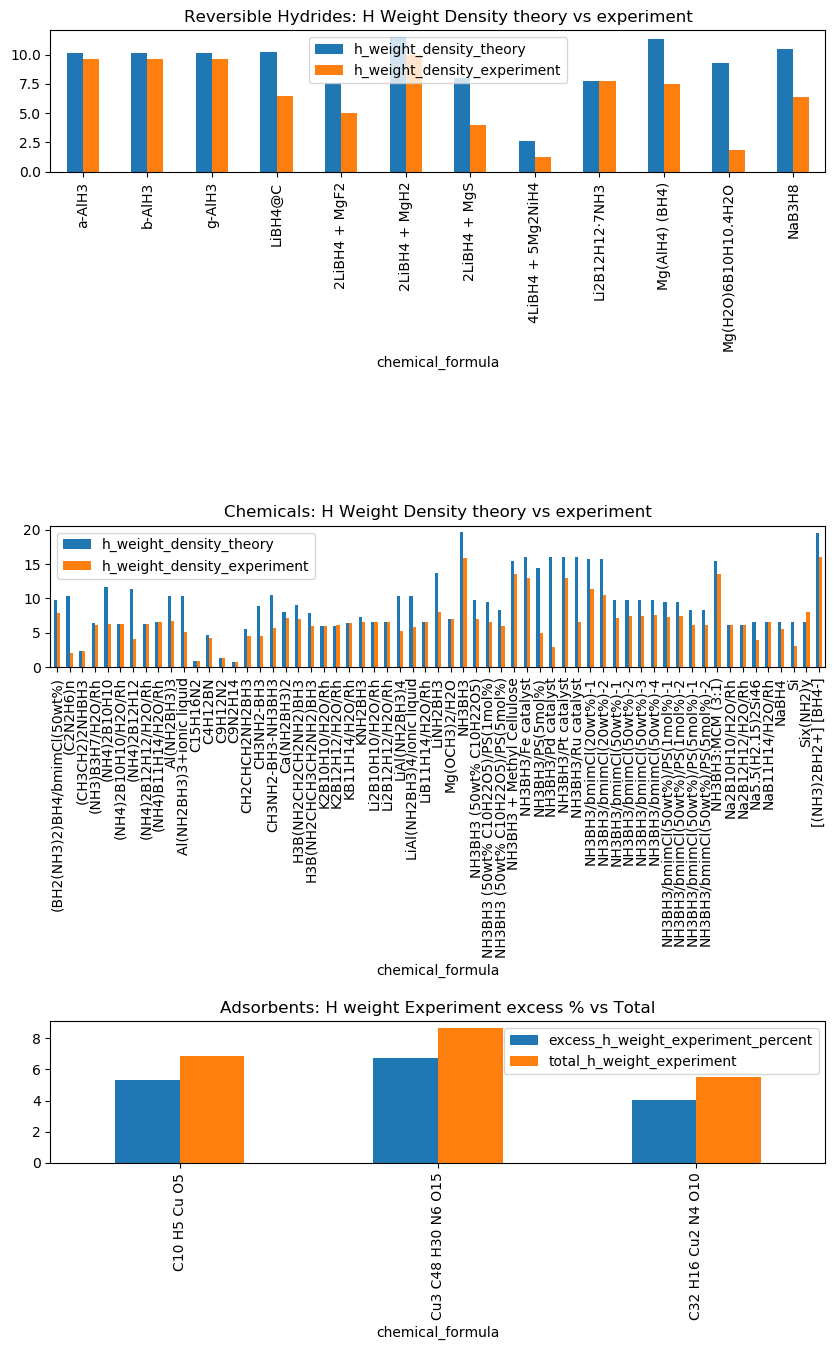

In [71]:
#Draw three plots, one from each of the material types:

plt.rcParams['figure.dpi'] = 100


fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

hweight_rh.plot.bar(x='chemical_formula', title='Reversible Hydrides: H Weight Density theory vs experiment',ax=ax1)
#hweight_chem_grp.plot.bar(x='chemical_formula', y=['h_weight_density_theory','h_weight_density_experiment'],ax=ax2)
hweight_chem_grp.plot.bar(title='Chemicals: H Weight Density theory vs experiment',ax=ax2)
hweight_ads.plot.bar(x='chemical_formula',title='Adsorbents: H weight Experiment excess % vs Total',ax=ax3)

fig.subplots_adjust(hspace=2.5)